# Create model for deployement

## Data

Data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [4]:
import numpy as np
import pandas as pd

In [5]:
iris = pd.read_csv('iris.csv')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [7]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
X = iris.drop('species',axis=1)
y = iris['species']

In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
scaled_X_train = scaler.transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(patience=10)

In [23]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 1s 5ms/sample - loss: 1.0703 - accuracy: 0.4417 - val_loss: 1.0744 - val_accuracy: 0.5667
Epoch 2/300
120/120 [==============================] - 0s 133us/sample - loss: 1.0642 - accuracy: 0.5667 - val_loss: 1.0697 - val_accuracy: 0.5667
Epoch 3/300
120/120 [==============================] - 0s 133us/sample - loss: 1.0587 - accuracy: 0.5583 - val_loss: 1.0654 - val_accuracy: 0.5333
Epoch 4/300
120/120 [==============================] - 0s 125us/sample - loss: 1.0537 - accuracy: 0.5583 - val_loss: 1.0614 - val_accuracy: 0.5333
Epoch 5/300
120/120 [==============================] - 0s 121us/sample - loss: 1.0491 - accuracy: 0.5333 - val_loss: 1.0577 - val_accuracy: 0.5333
Epoch 6/300
120/120 [==============================] - 0s 117us/sample - loss: 1.0449 - accuracy: 0.5250 - val_loss: 1.0544 - val_accuracy: 0.5000
Epoch 7/300
120/120 [==============================] - 0s 125us/sample - lo

120/120 [==============================] - 0s 117us/sample - loss: 0.9347 - accuracy: 0.6833 - val_loss: 0.9648 - val_accuracy: 0.6000
Epoch 57/300
120/120 [==============================] - 0s 117us/sample - loss: 0.9325 - accuracy: 0.6833 - val_loss: 0.9631 - val_accuracy: 0.6000
Epoch 58/300
120/120 [==============================] - 0s 113us/sample - loss: 0.9303 - accuracy: 0.6833 - val_loss: 0.9613 - val_accuracy: 0.6000
Epoch 59/300
120/120 [==============================] - 0s 108us/sample - loss: 0.9282 - accuracy: 0.6833 - val_loss: 0.9596 - val_accuracy: 0.6000
Epoch 60/300
120/120 [==============================] - 0s 108us/sample - loss: 0.9261 - accuracy: 0.6833 - val_loss: 0.9580 - val_accuracy: 0.6000
Epoch 61/300
120/120 [==============================] - 0s 108us/sample - loss: 0.9239 - accuracy: 0.6833 - val_loss: 0.9563 - val_accuracy: 0.6000
Epoch 62/300
120/120 [==============================] - 0s 117us/sample - loss: 0.9216 - accuracy: 0.6833 - val_loss: 0.9545 

120/120 [==============================] - 0s 142us/sample - loss: 0.8163 - accuracy: 0.6833 - val_loss: 0.8640 - val_accuracy: 0.6000
Epoch 112/300
120/120 [==============================] - 0s 158us/sample - loss: 0.8144 - accuracy: 0.6833 - val_loss: 0.8623 - val_accuracy: 0.6000
Epoch 113/300
120/120 [==============================] - 0s 167us/sample - loss: 0.8123 - accuracy: 0.6833 - val_loss: 0.8604 - val_accuracy: 0.6000
Epoch 114/300
120/120 [==============================] - 0s 142us/sample - loss: 0.8102 - accuracy: 0.6833 - val_loss: 0.8585 - val_accuracy: 0.6000
Epoch 115/300
120/120 [==============================] - 0s 150us/sample - loss: 0.8082 - accuracy: 0.6833 - val_loss: 0.8568 - val_accuracy: 0.6000
Epoch 116/300
120/120 [==============================] - 0s 150us/sample - loss: 0.8062 - accuracy: 0.6833 - val_loss: 0.8550 - val_accuracy: 0.6000
Epoch 117/300
120/120 [==============================] - 0s 158us/sample - loss: 0.8042 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 108us/sample - loss: 0.7161 - accuracy: 0.6833 - val_loss: 0.7711 - val_accuracy: 0.6000
Epoch 167/300
120/120 [==============================] - 0s 125us/sample - loss: 0.7145 - accuracy: 0.6833 - val_loss: 0.7696 - val_accuracy: 0.6000
Epoch 168/300
120/120 [==============================] - 0s 125us/sample - loss: 0.7129 - accuracy: 0.6833 - val_loss: 0.7680 - val_accuracy: 0.6000
Epoch 169/300
120/120 [==============================] - 0s 125us/sample - loss: 0.7114 - accuracy: 0.6833 - val_loss: 0.7664 - val_accuracy: 0.6000
Epoch 170/300
120/120 [==============================] - 0s 133us/sample - loss: 0.7098 - accuracy: 0.6833 - val_loss: 0.7650 - val_accuracy: 0.6000
Epoch 171/300
120/120 [==============================] - 0s 100us/sample - loss: 0.7083 - accuracy: 0.6833 - val_loss: 0.7634 - val_accuracy: 0.6000
Epoch 172/300
120/120 [==============================] - 0s 117us/sample - loss: 0.7067 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 117us/sample - loss: 0.6414 - accuracy: 0.6833 - val_loss: 0.6967 - val_accuracy: 0.6000
Epoch 222/300
120/120 [==============================] - 0s 111us/sample - loss: 0.6402 - accuracy: 0.6833 - val_loss: 0.6955 - val_accuracy: 0.6000
Epoch 223/300
120/120 [==============================] - 0s 119us/sample - loss: 0.6391 - accuracy: 0.6833 - val_loss: 0.6943 - val_accuracy: 0.6000
Epoch 224/300
120/120 [==============================] - 0s 117us/sample - loss: 0.6379 - accuracy: 0.6833 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 225/300
120/120 [==============================] - 0s 125us/sample - loss: 0.6368 - accuracy: 0.6833 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 226/300
120/120 [==============================] - 0s 141us/sample - loss: 0.6357 - accuracy: 0.6833 - val_loss: 0.6911 - val_accuracy: 0.6000
Epoch 227/300
120/120 [==============================] - 0s 125us/sample - loss: 0.6346 - accuracy: 0.6833 - val_loss: 0

Epoch 276/300
120/120 [==============================] - 0s 150us/sample - loss: 0.5830 - accuracy: 0.7000 - val_loss: 0.6371 - val_accuracy: 0.6333
Epoch 277/300
120/120 [==============================] - 0s 116us/sample - loss: 0.5819 - accuracy: 0.7000 - val_loss: 0.6359 - val_accuracy: 0.6333
Epoch 278/300
120/120 [==============================] - 0s 126us/sample - loss: 0.5809 - accuracy: 0.7000 - val_loss: 0.6349 - val_accuracy: 0.6333
Epoch 279/300
120/120 [==============================] - 0s 116us/sample - loss: 0.5798 - accuracy: 0.7000 - val_loss: 0.6339 - val_accuracy: 0.6333
Epoch 280/300
120/120 [==============================] - 0s 99us/sample - loss: 0.5787 - accuracy: 0.7000 - val_loss: 0.6327 - val_accuracy: 0.6333
Epoch 281/300
120/120 [==============================] - 0s 118us/sample - loss: 0.5776 - accuracy: 0.7000 - val_loss: 0.6316 - val_accuracy: 0.6333
Epoch 282/300
120/120 [==============================] - 0s 113us/sample - loss: 0.5765 - accuracy: 0.7000 

## Model Evaluation

In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.070269,0.441667,1.074426,0.566667
1,1.064213,0.566667,1.069710,0.566667
2,1.058741,0.558333,1.065439,0.533333
3,1.053747,0.558333,1.061370,0.533333
4,1.049104,0.533333,1.057692,0.533333
...,...,...,...,...
295,0.561070,0.725000,0.613523,0.633333
296,0.559938,0.725000,0.612511,0.633333
297,0.558826,0.725000,0.611442,0.633333
298,0.557750,0.725000,0.610363,0.633333


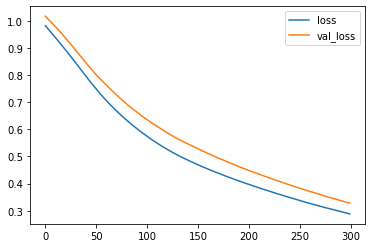

In [30]:
metrics[['loss','val_loss']].plot()

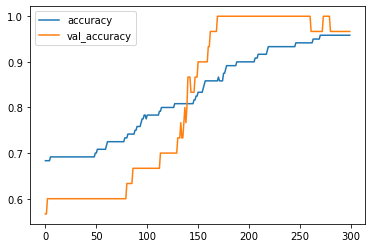

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [26]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.6092745661735535, 0.6666667]

## Ready Model for Deployment

In [27]:
epochs = len(metrics)

In [28]:
scaled_X = scaler.fit_transform(X)

In [29]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(scaled_X,y,epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 1ms/sample - loss: 1.1625 - accuracy: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 60us/sample - loss: 1.1552 - accuracy: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 74us/sample - loss: 1.1486 - accuracy: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 53us/sample - loss: 1.1427 - accuracy: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 67us/sample - loss: 1.1358 - accuracy: 0.3333
Epoch 6/300
150/150 [==============================] - 0s 60us/sample - loss: 1.1294 - accuracy: 0.3333
Epoch 7/300
150/150 [==============================] - 0s 67us/sample - loss: 1.1234 - accuracy: 0.3333
Epoch 8/300
150/150 [==============================] - 0s 67us/sample - loss: 1.1175 - accuracy: 0.3333
Epoch 9/300
150/150 [==============================] - 0s 53us/sample - loss: 1.1113 - accuracy: 0.3333
Epoch 10/300
150/150 [======================

150/150 [==============================] - 0s 53us/sample - loss: 0.8148 - accuracy: 0.6600
Epoch 79/300
150/150 [==============================] - 0s 53us/sample - loss: 0.8120 - accuracy: 0.6600
Epoch 80/300
150/150 [==============================] - 0s 53us/sample - loss: 0.8088 - accuracy: 0.6600
Epoch 81/300
150/150 [==============================] - 0s 53us/sample - loss: 0.8060 - accuracy: 0.6667
Epoch 82/300
150/150 [==============================] - 0s 54us/sample - loss: 0.8031 - accuracy: 0.6667
Epoch 83/300
150/150 [==============================] - 0s 53us/sample - loss: 0.8001 - accuracy: 0.6667
Epoch 84/300
150/150 [==============================] - 0s 47us/sample - loss: 0.7973 - accuracy: 0.6667
Epoch 85/300
150/150 [==============================] - 0s 54us/sample - loss: 0.7944 - accuracy: 0.6667
Epoch 86/300
150/150 [==============================] - 0s 40us/sample - loss: 0.7917 - accuracy: 0.6667
Epoch 87/300
150/150 [==============================] - 0s 60us/samp

150/150 [==============================] - 0s 40us/sample - loss: 0.6460 - accuracy: 0.6667
Epoch 156/300
150/150 [==============================] - 0s 53us/sample - loss: 0.6444 - accuracy: 0.6667
Epoch 157/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6429 - accuracy: 0.6667
Epoch 158/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6414 - accuracy: 0.6667
Epoch 159/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6398 - accuracy: 0.6667
Epoch 160/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6383 - accuracy: 0.6667
Epoch 161/300
150/150 [==============================] - 0s 53us/sample - loss: 0.6368 - accuracy: 0.6667
Epoch 162/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6353 - accuracy: 0.6667
Epoch 163/300
150/150 [==============================] - 0s 47us/sample - loss: 0.6339 - accuracy: 0.6667
Epoch 164/300
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 47us/sample - loss: 0.5509 - accuracy: 0.7067
Epoch 233/300
150/150 [==============================] - 0s 47us/sample - loss: 0.5499 - accuracy: 0.7067
Epoch 234/300
150/150 [==============================] - 0s 46us/sample - loss: 0.5490 - accuracy: 0.7067
Epoch 235/300
150/150 [==============================] - 0s 53us/sample - loss: 0.5480 - accuracy: 0.7067
Epoch 236/300
150/150 [==============================] - 0s 47us/sample - loss: 0.5470 - accuracy: 0.7067
Epoch 237/300
150/150 [==============================] - 0s 40us/sample - loss: 0.5460 - accuracy: 0.7067
Epoch 238/300
150/150 [==============================] - 0s 60us/sample - loss: 0.5451 - accuracy: 0.7067
Epoch 239/300
150/150 [==============================] - 0s 40us/sample - loss: 0.5441 - accuracy: 0.7067
Epoch 240/300
150/150 [==============================] - 0s 53us/sample - loss: 0.5432 - accuracy: 0.7133
Epoch 241/300
150/150 [==============================] - 0s 

In [31]:
model.save("final_iris_model.h5")

### Saving Scaler

In [32]:
import joblib

In [33]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [34]:
from tensorflow.keras.models import load_model

In [35]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [36]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [37]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [38]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [39]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]
                    

In [41]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'